<a href="https://colab.research.google.com/github/Desmyk/PYDATACAPSTONE/blob/main/Capstoneedit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Dataset from Dataquest.com(Data Analysis with Code R)(Covid.csv)
This dataset contains daily case counts, death counts, and other relevant data for different countries and US states.

The COVID-19 pandemic has had a profound impact on the world, causing widespread illness, economic disruption, and social upheaval.
As the virus continues to spread, it is more important than ever to understand its characteristics and how it affects different populations.

This project will analyze a COVID-19 dataset to gain insights into the following questions:

How has the pandemic evolved over time?
Which regions have been most affected?
which countries have had severe exposure?
How is the rcovery rate?
How effective have public health interventions been in mitigating the spread of the virus?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium as fm
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the dataset from my Drive

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid19.csv")
data

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,2020-06-01,Asia,ID,Indonesia,All States,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,All States,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,All States,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0


In [ ]:
# determine dimension of the df

dim = data.shape
dim

(10903, 14)

In [ ]:
# get the column names

column_names = data.columns.tolist()

column_names

['Date',
 'Continent_Name',
 'Two_Letter_Country_Code',
 'Country_Region',
 'Province_State',
 'positive',
 'hospitalized',
 'recovered',
 'death',
 'total_tested',
 'active',
 'hospitalizedCurr',
 'daily_tested',
 'daily_positive']

In [ ]:
# display first few rows

data.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


In [ ]:
# display last few rows

data.tail()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10898,2020-06-01,Asia,ID,Indonesia,All States,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,All States,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,All States,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,All States,0,0,0,0,261004,0,0,0,0


In [ ]:
# display summary of the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

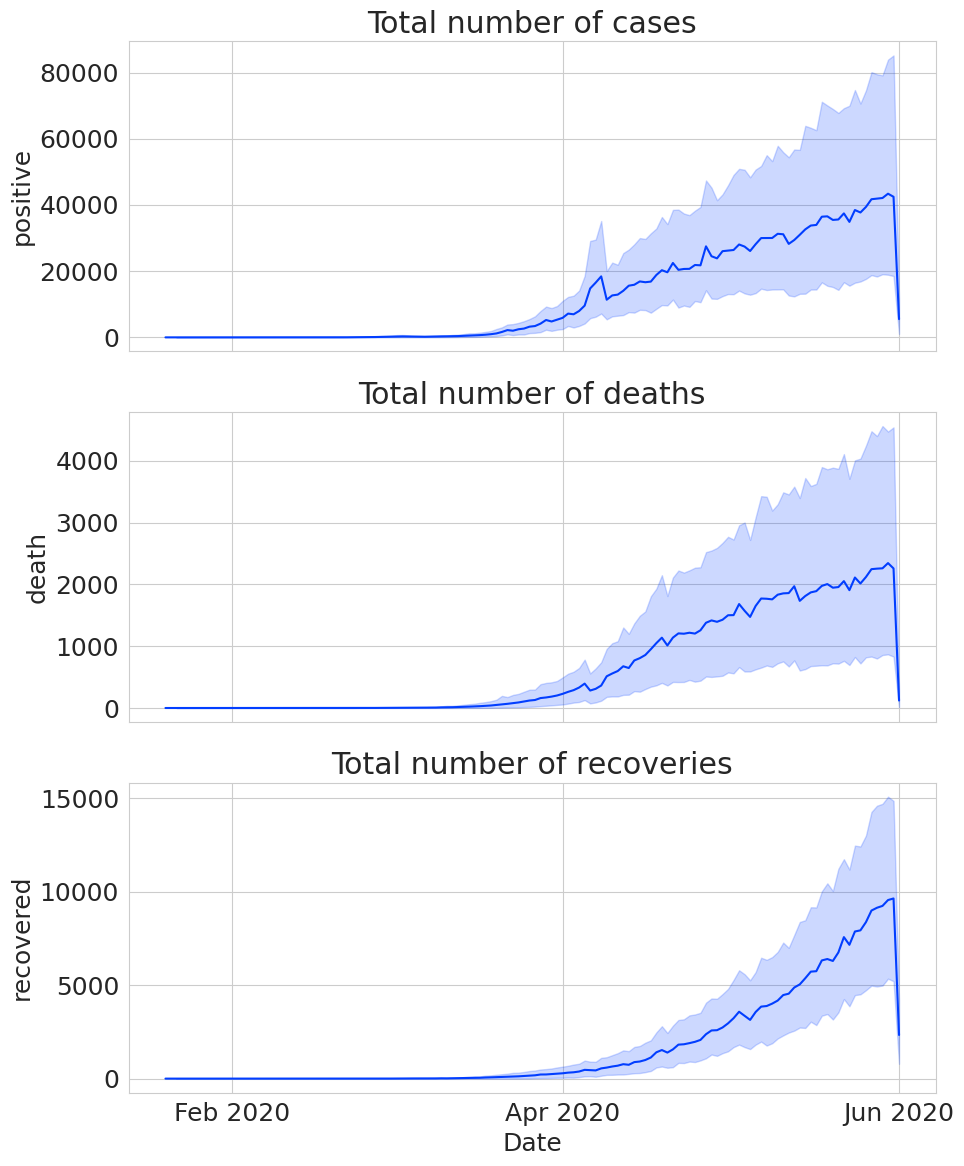

In [ ]:
# Total Cases, Deaths and Recovered plots

# Set the font size for all text elements
plt.rc({'font.size': 15})

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot the total number of cases
sns.lineplot(data=data, x="Date", y="positive", ax=ax[0])
ax[0].set_title("Total number of cases")

# Plot the total number of deaths
sns.lineplot(data=data, x="Date", y="death", ax=ax[1])
ax[1].set_title("Total number of deaths")

# Plot the total number of recoveries
sns.lineplot(data=data, x="Date", y="recovered", ax=ax[2])
ax[2].set_title("Total number of recoveries")


# Format the x-axis
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax[0].set_xlabel("Date")

# Show the plot
plt.tight_layout()
plt.show()

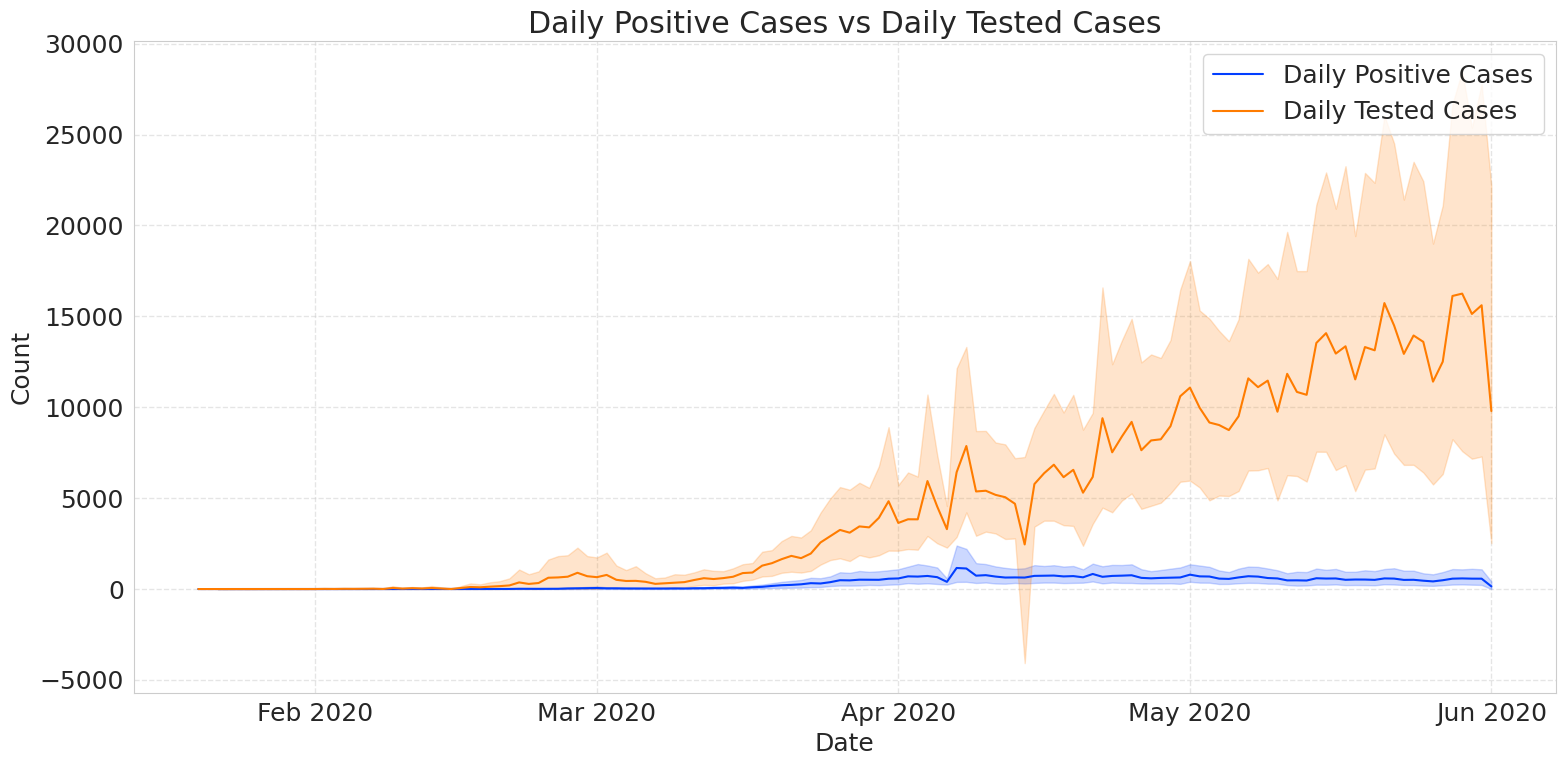

In [ ]:
import matplotlib.dates as mdates

# Convert the "Date" column to a datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the daily positive cases and daily tested cases
sns.lineplot(data=data, x="Date", y="daily_positive", label="Daily Positive Cases", ax=ax)
sns.lineplot(data=data, x="Date", y="daily_tested", label="Daily Tested Cases", ax=ax)

# Format the x-axis to show all months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Add gridlines
ax.grid(True, linestyle='--', linewidth=1, alpha=0.5)

# Add labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Daily Positive Cases vs Daily Tested Cases")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# find total deaths by Country_Region

grouped_data = data.groupby('Country_Region')['death'].sum()
grouped_data

Country_Region
Albania                 0
Argentina               0
Armenia              2682
Australia           10410
Austria                 0
                   ...   
United Kingdom     863557
United States     6808745
Uruguay                 0
Venezuela               0
Vietnam                 0
Name: death, Length: 109, dtype: int64

In [ ]:
# the top 10 countries with the most death
# Sort the data by total deaths in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Extract the top 10 countries with the most deaths
top_10_countries = sorted_data.head(10)

top_10_countries

Country_Region
United States     6808745
Italy             1734418
United Kingdom     863557
Belgium            274862
Canada             217332
Turkey             174954
Russia              92475
Poland              38047
Sweden              26297
Ukraine             18851
Name: death, dtype: int64

In [ ]:
# find total cases by Country_Region

group_data = data.groupby('Country_Region')['positive'].sum()
group_data

Country_Region
Albania               12279
Argentina             28220
Armenia              201371
Australia            897936
Austria              541013
                    ...    
United Kingdom      4980411
United States     133567277
Uruguay                2160
Venezuela               461
Vietnam                6450
Name: positive, Length: 109, dtype: int64

In [ ]:
# the top 10 countries with the most cases
# Sort the data by cases in descending order
sort_data = group_data.sort_values(ascending=False)

# Extract the top 10 countries with the most deaths
top_10_cases = sort_data.head(10)

top_10_cases

Country_Region
United States     133567277
Italy              14006022
Russia              9410355
Turkey              6679813
Canada              6587044
United Kingdom      4980411
Belgium             1883221
Peru                 942706
South Korea          920238
India                913912
Name: positive, dtype: int64

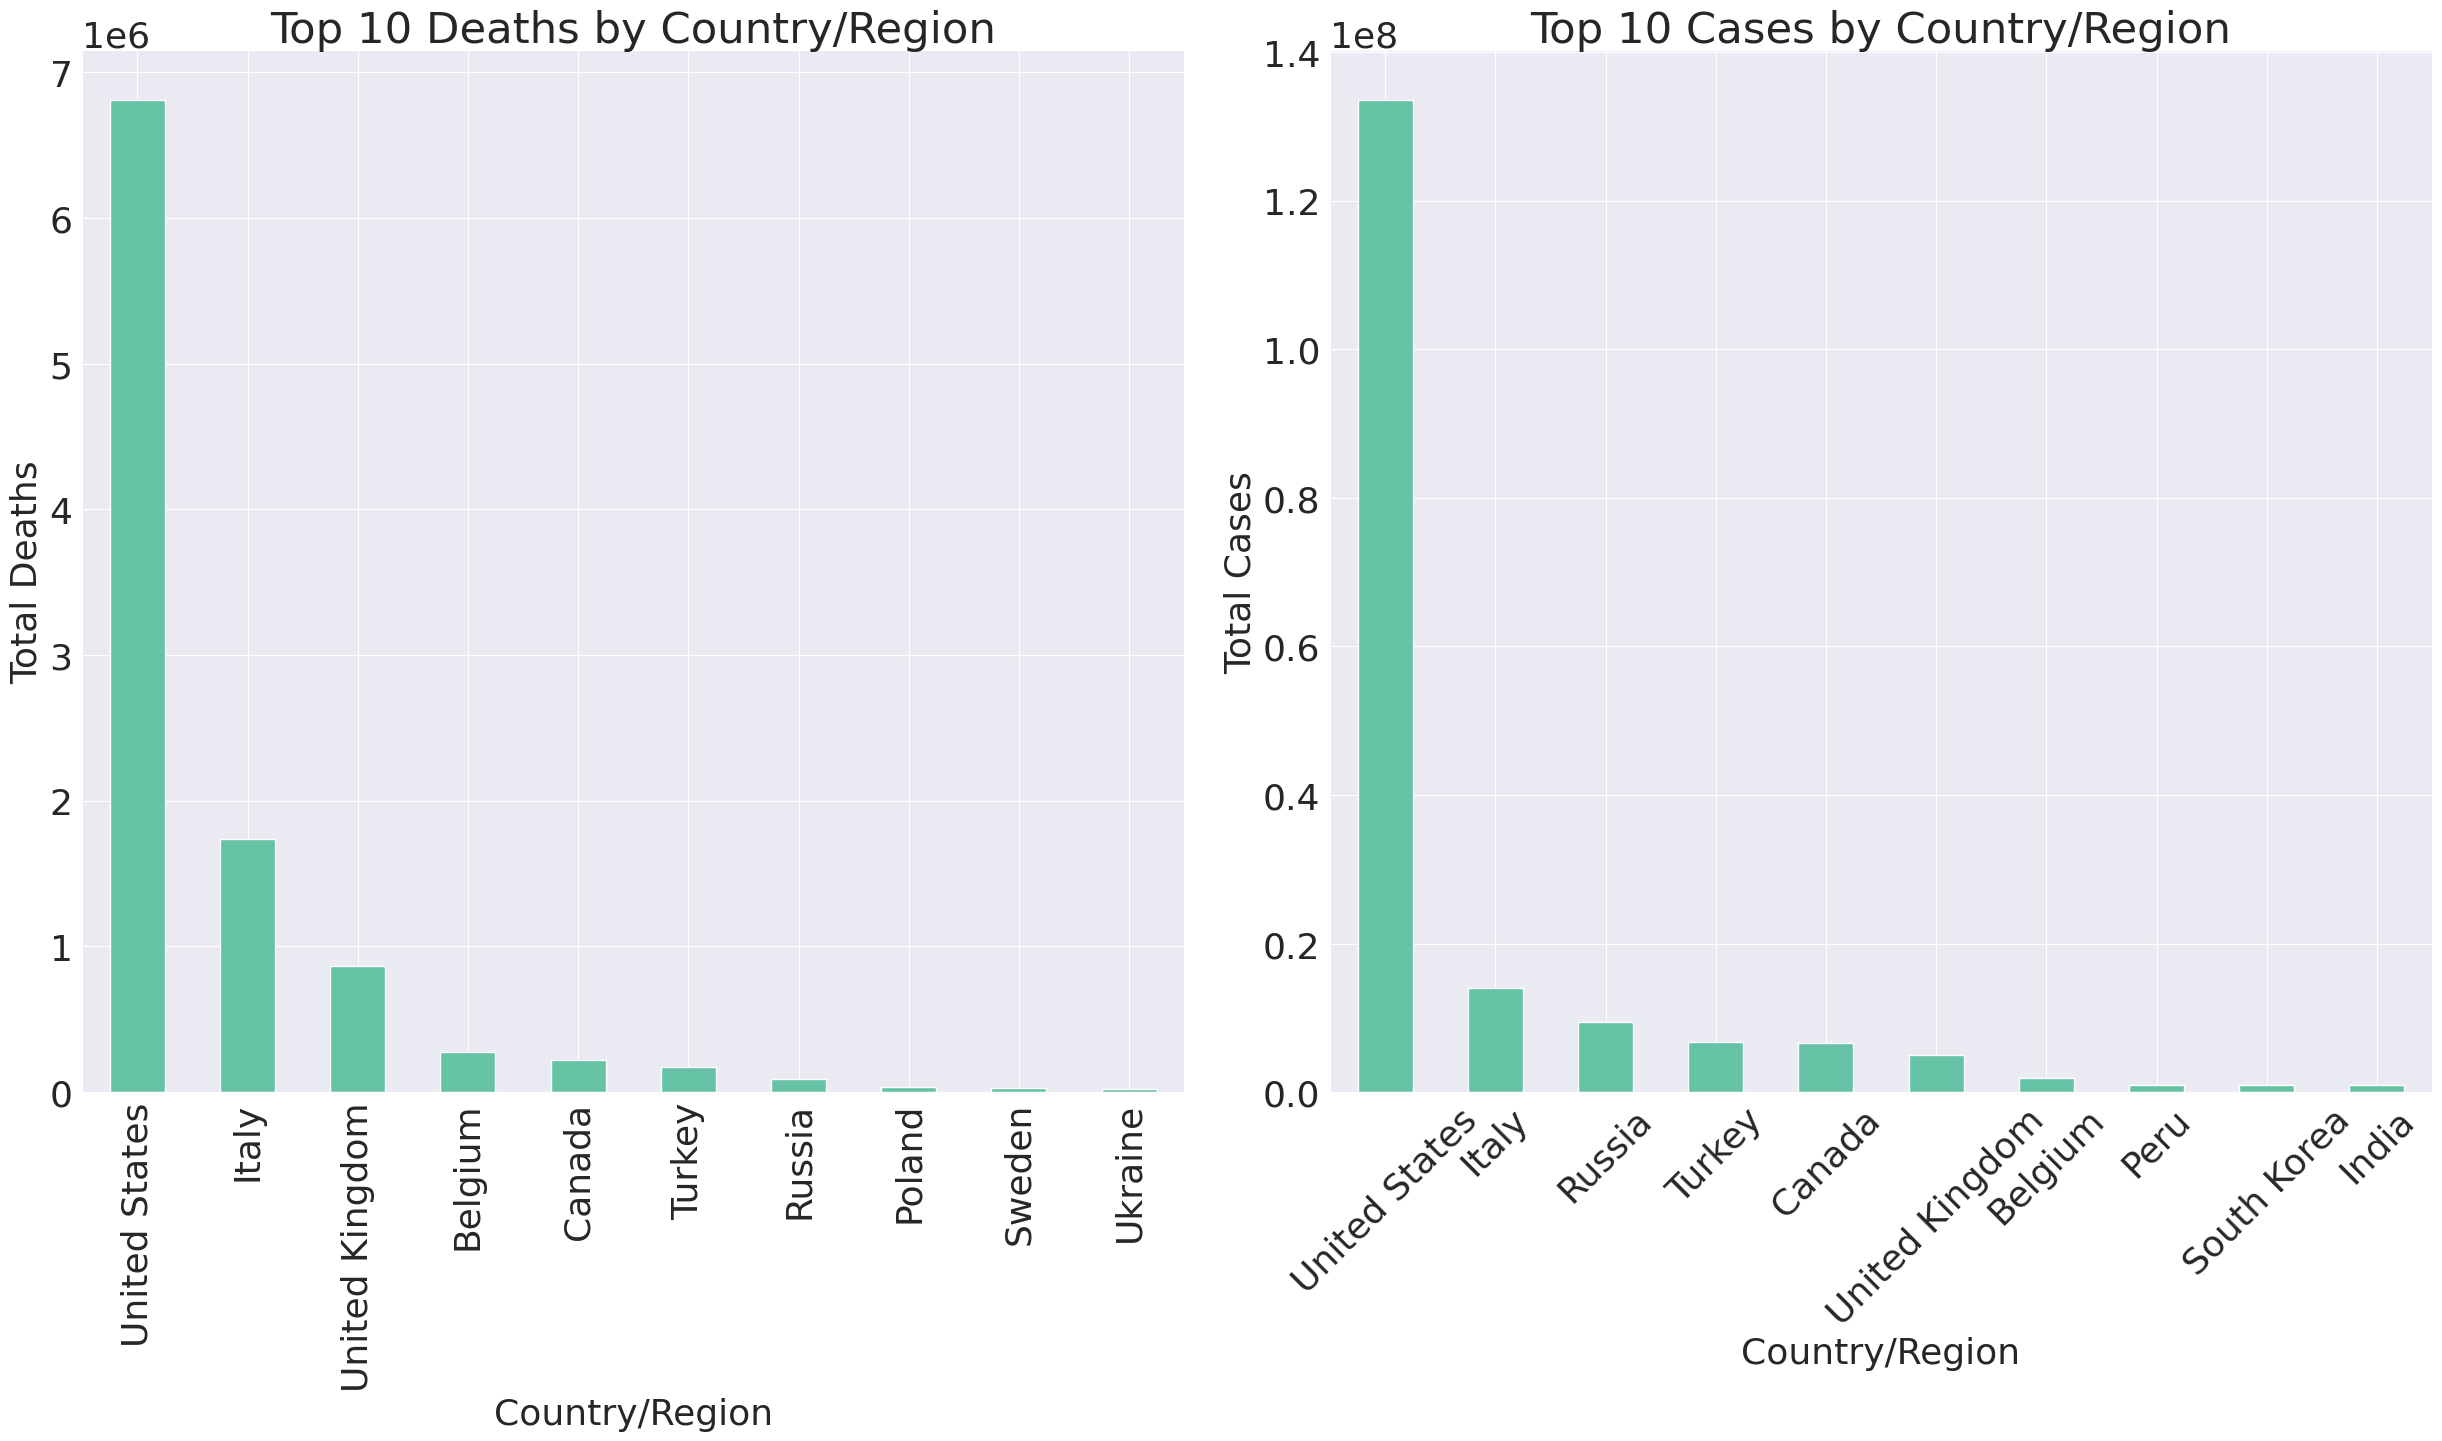

In [ ]:
# Create a bar chart with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))

# Set the font size
plt.rc('font', size=26)

# Plot the top 10 deaths by country/region
sns.set_style("darkgrid")
sns.set_palette("Set2")
top_10_countries.plot(kind="bar", x="Country_Region", y="total_deaths", ax=ax1)
ax1.set_title("Top 10 Deaths by Country/Region")
ax1.set_xlabel("Country/Region")
ax1.set_ylabel("Total Deaths")
ax1.tick_params(axis="x", rotation=90)

# Plot the top 10 cases by country/region
top_10_cases.plot(kind="bar", x="Country_Region", y="total_cases", ax=ax2)
ax2.set_title("Top 10 Cases by Country/Region")
ax2.set_xlabel("Country/Region")
ax2.set_ylabel("Total Cases")
ax2.tick_params(axis="x", rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by country/region and sum the recovered cases.
recovered_data = data.groupby('Country_Region')['recovered'].sum()

# Sort the data by recovered cases in descending order and select the top 10.
top_10_recoveries = recovered_data.sort_values(ascending=False).head(10)

top_10_recoveries


Country_Region
United States    10548079
Italy             5120095
Turkey            3523898
Russia            2378177
Canada            1930745
Australia          609758
South Korea        599796
Belgium            409025
Poland             267093
Ukraine            162853
Name: recovered, dtype: int64

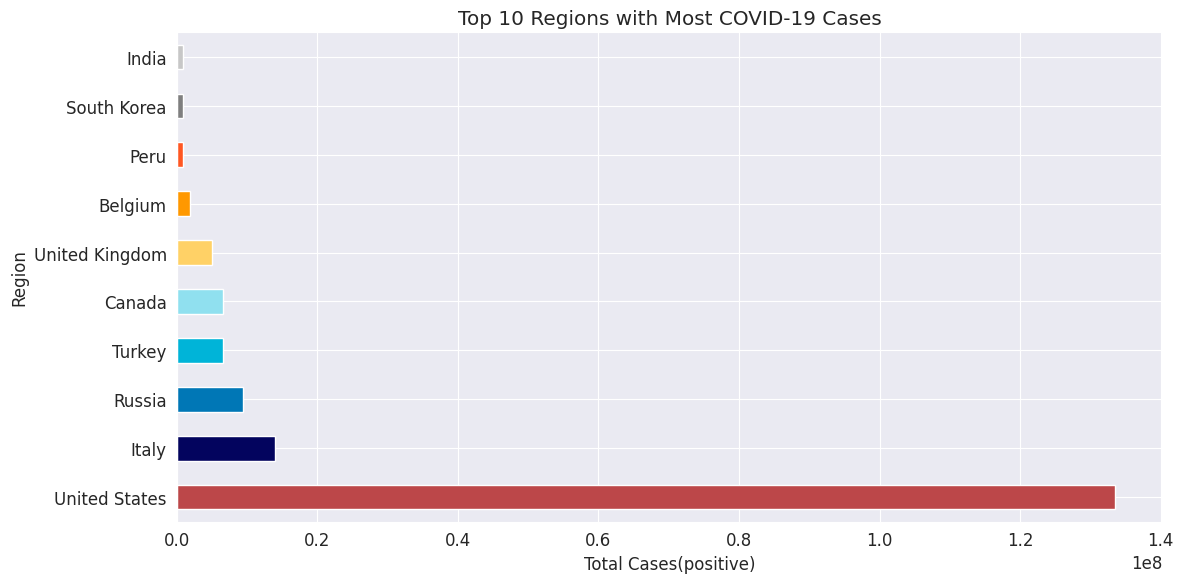

In [ ]:
# Sort the data by total cases in descending order
sorted_data = group_data.sort_values(ascending=False)

# Extract the top 10 regions with the most cases
top_10_regions = sorted_data.head(10)

top_10_regions
# Increase font size
plt.rcParams['font.size'] = 12

color_palette = ["#bc4749", "#03045E", "#0077B6", "#00B4D8", "#90E0EF", "#FFD166", "#FF9800", "#FF5722", "#7F7F7F", "#C7C7C7"]

plt.figure(figsize=(12, 6))
top_10_regions.plot(kind="barh", color=color_palette)
plt.xlabel("Total Cases(positive)")
plt.ylabel("Region")
plt.title("Top 10 Regions with Most COVID-19 Cases")
plt.tight_layout()
plt.show()

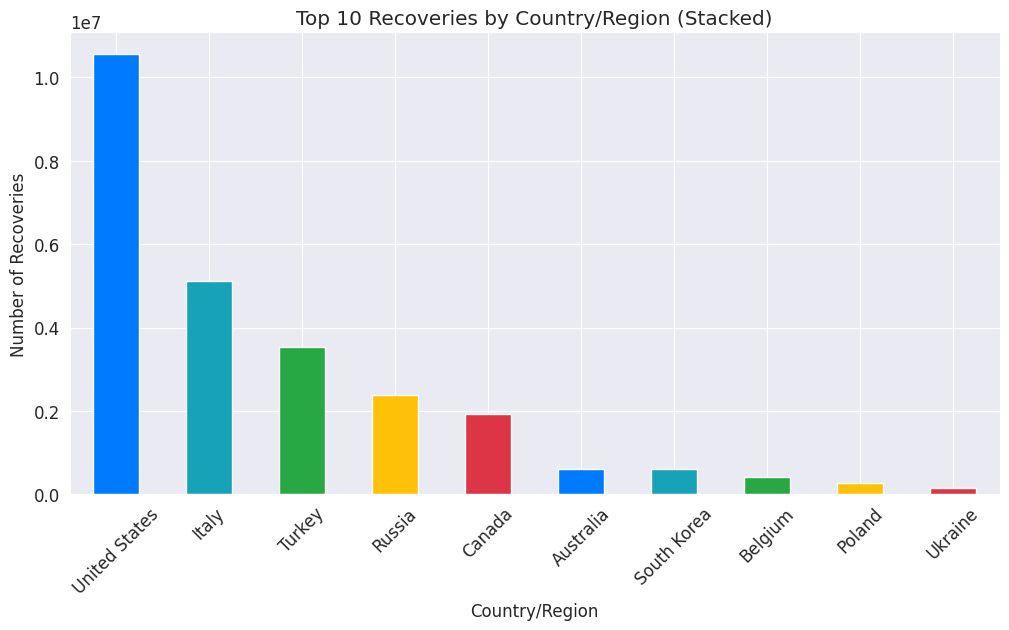

In [ ]:
# Create a stacked bar chart of the top 10 recoveries
plt.figure(figsize=(12, 6))

# Set the color of the bars
top_10_recoveries.plot(kind='bar', stacked=True, color=custom_palette)

# Add labels and title.
plt.xlabel('Country/Region')
plt.ylabel('Number of Recoveries')
plt.title('Top 10 Recoveries by Country/Region (Stacked)')

# Create a custom color palette
custom_palette = ['#007bff', '#17a2b8', '#28a745', '#ffc107', '#dc3545']

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45)

# Show the plot.
plt.show()

<ipython-input-124-6587d05c8237>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='positive', y='Continent_Name', inner='box', palette='Dark2')


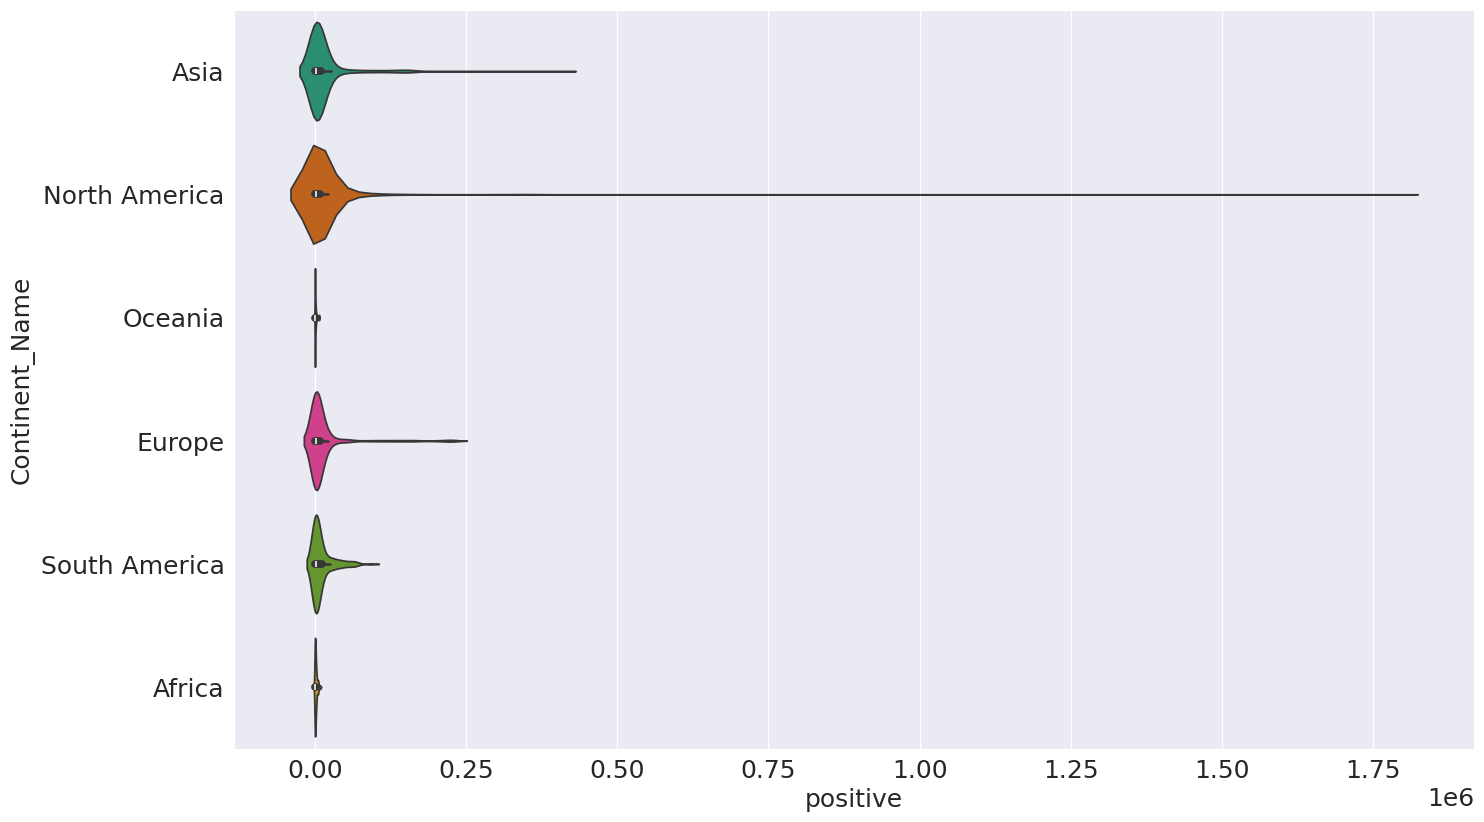

In [ ]:
# Continent_Name vs positive

# Set the figure size based on the number of unique continents
figsize = (16, 1.6 * len(data['Continent_Name'].unique()))

# Create the figure
plt.figure(figsize=figsize)

# Increase the font size of all text elements
plt.rcParams.update({'font.size': 18})

# Create a violin plot with inner box and dark2 palette
sns.violinplot(data=data, x='positive', y='Continent_Name', inner='box', palette='Dark2')

# Remove the top, right, bottom, and left spines
#sns.despine( right=True, bottom=True, left=True)

# Show the plot
plt.show()

<ipython-input-142-55fa1ef1ede3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recovered", y="Continent_Name", data=data, orient='h', palette=colors)
<ipython-input-142-55fa1ef1ede3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=12)
<ipython-input-142-55fa1ef1ede3>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=12)


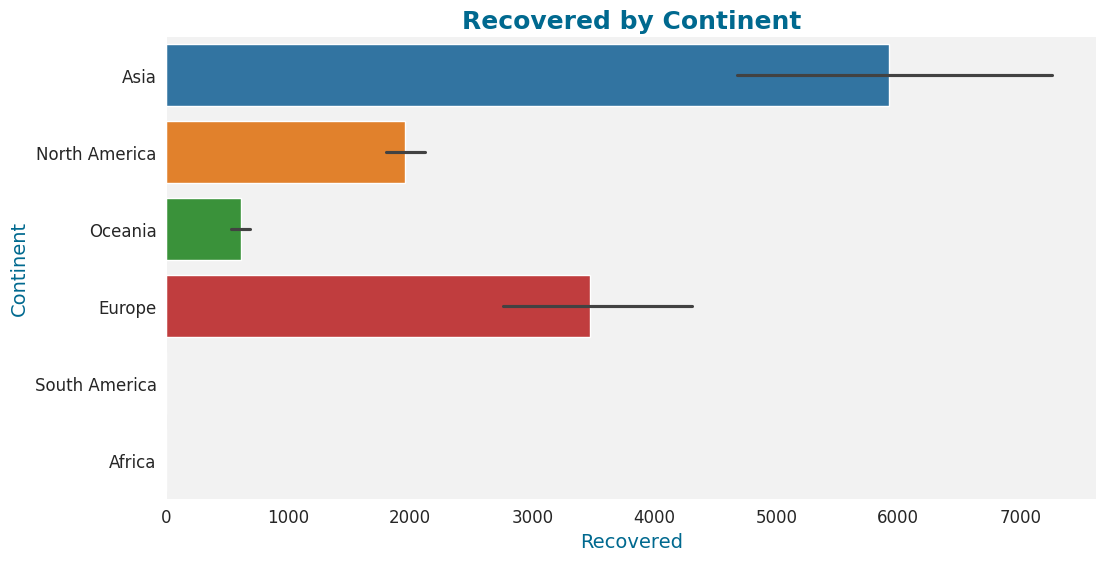

In [ ]:
# Continent_Name vs recovered

# Create a horizontal bar plot with seaborn
sns.set_style("dark")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Define a list of colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a horizontal bar chart with Continent_Name on the y-axis and recovered on the x-axis
sns.barplot(x="recovered", y="Continent_Name", data=data, orient='h', palette=colors)

# Increase the font size of the x-axis tick labels
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=12)

# Increase the font size of the y-axis tick labels
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=12)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Set the labels for the x and y axes
plt.xlabel("Recovered", fontsize=14, color="#00698f")
plt.ylabel("Continent", fontsize=14, color="#00698f")

# Set the title of the plot
plt.title("Recovered by Continent", fontsize=18, color="#00698f", fontweight="bold")

# Add a background color to the plot
plt.gca().set_facecolor("#f2f2f2")

# Show the plot
plt.show()

In [ ]:
# find total tested by Country_Region

t_tested = data.groupby('Country_Region')['total_tested'].sum()
t_tested

Country_Region
Albania              164305
Argentina            536475
Armenia             1634541
Australia          92028873
Austria            14166167
                    ...    
United Kingdom     26041596
United States     938854656
Uruguay               91258
Venezuela           1724160
Vietnam             5066946
Name: total_tested, Length: 109, dtype: int64

In [ ]:
# Calculate the positive test rate for each region
data["positive_rate"] = data["positive"] / data["total_tested"]

# Drop all rows with missing values in the 'positive' columns
data.dropna(subset=["positive_rate"], inplace=True)

# Drop all rows with missing values in the 'positive' columns
data.dropna(subset=["positive_rate"], inplace=True)

# Group the data by region and calculate the sum of positive_rate
positive_rate_region = data.groupby("Country_Region")["positive_rate"].sum()

# Sort the data by positive_rate in descending order
positive_rate_sorted = positive_rate_region.sort_values(ascending=False)

# Print the top 10 regions with the highest positive test rate
positive_rate_sorted.head(10)

# Merge the two dataframes (top ten cases and highest positive test rates)
merged_data = pd.merge(positive_rate_region, positive_rate_sorted, on="Country_Region")

# Print the merged data
merged_data

,positive_rate_x,positive_rate_y
Country_Region,,
Albania,2.624744,2.624744
Argentina,1.347901,1.347901
Armenia,10.178279,10.178279
Australia,NaN,NaN
Austria,3.124247,3.124247
...,...,...
United Kingdom,15.809919,15.809919
United States,781.945377,781.945377
Uruguay,0.244225,0.244225


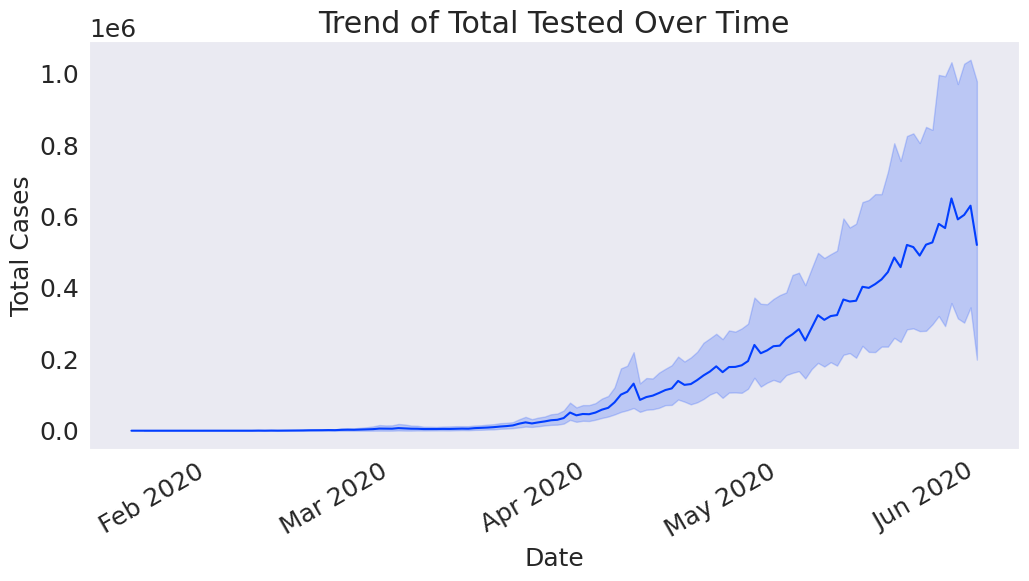

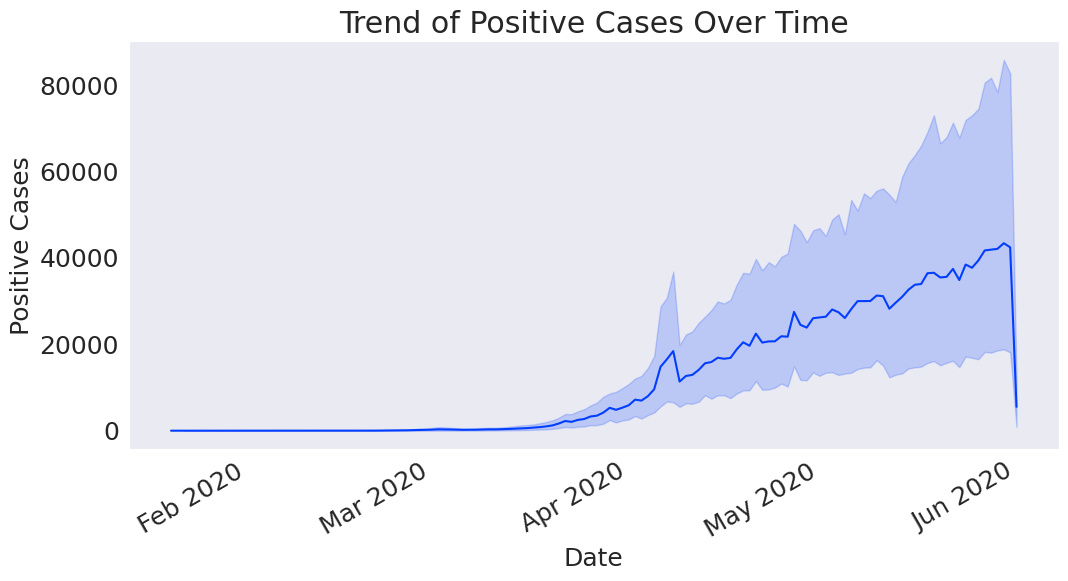

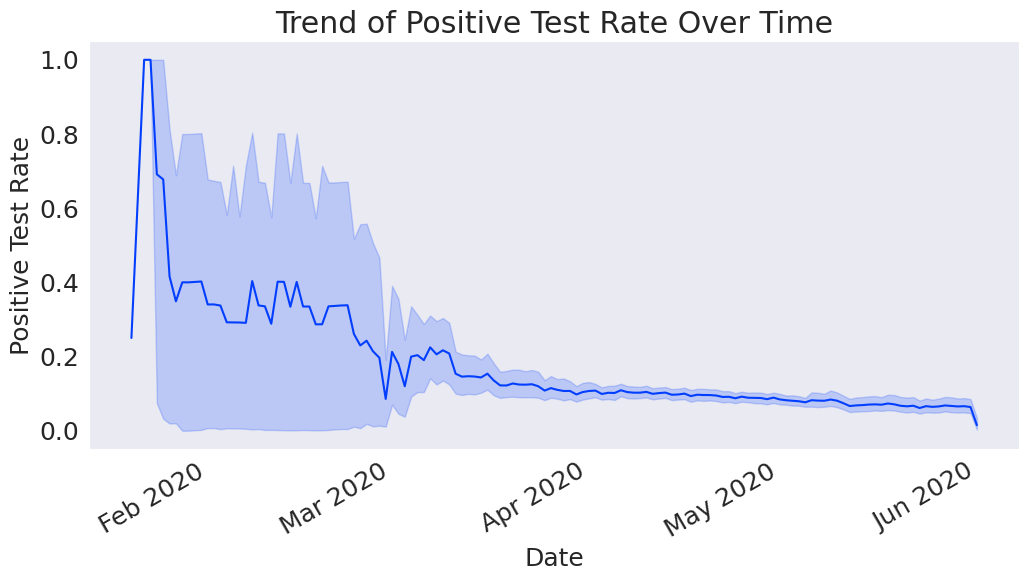

In [ ]:
# Format the x-axis tick labels for the total tested line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="total_tested")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Trend of Total Tested Over Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gcf().autofmt_xdate()
plt.show()

# Format the x-axis tick labels for the positive cases line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="positive")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.title("Trend of Positive Cases Over Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gcf().autofmt_xdate()
plt.show()

# Format the x-axis tick labels for the positive test rate line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="positive_rate")
plt.xlabel("Date")
plt.ylabel("Positive Test Rate")
plt.title("Trend of Positive Test Rate Over Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gcf().autofmt_xdate()
plt.show()

<ipython-input-157-3e4d6f348d3e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=12)
<ipython-input-157-3e4d6f348d3e>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=12)


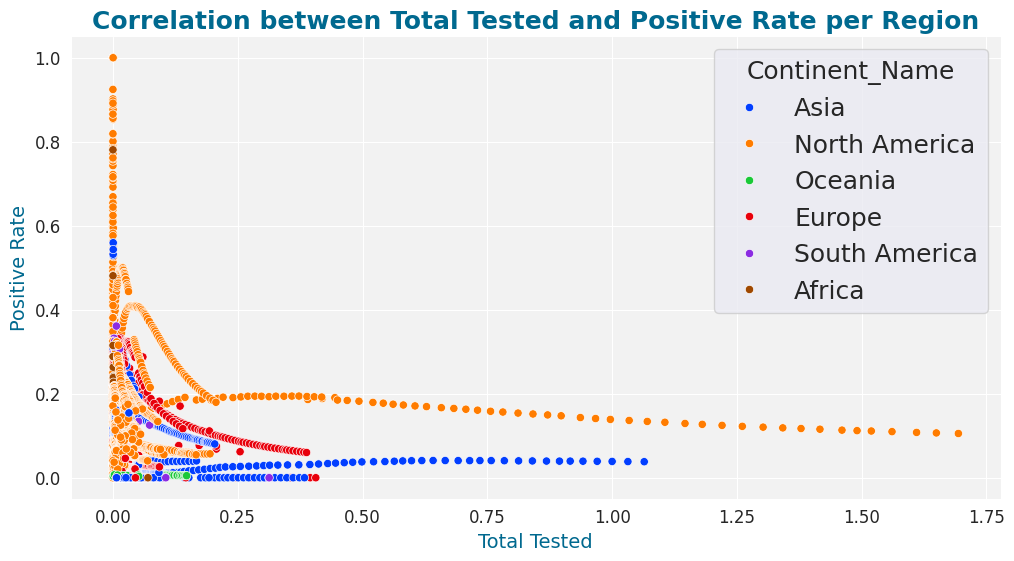

In [ ]:
# correlation between Total Tested and Positive rate
# Set the size of the plot
figsize = (12, 6)

# Create a new figure
plt.figure(figsize=figsize)

# Create a scatter plot of Total Tested vs Positive Rate
sns.scatterplot(data=data, x="total_tested", y="positive_rate", hue="Continent_Name")

# Add a trend line to the scatter plot
z = np.polyfit(data['total_tested'], data['positive_rate'], 1)
p = np.poly1d(z)
plt.plot(data['total_tested'],p(data['total_tested']),"r--")

# Add grid
plt.grid(True)

# Increase the font size of the x-axis tick labels
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=12)

# Increase the font size of the y-axis tick labels
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=12)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Set the labels for the x and y axes
plt.xlabel("Total Tested", fontsize=14, color="#00698f")
plt.ylabel("Positive Rate", fontsize=14, color="#00698f")

# Set the title of the plot
plt.title("Correlation between Total Tested and Positive Rate per Region", fontsize=18, color="#00698f", fontweight="bold")

# Add a background color to the plot
plt.gca().set_facecolor("#f2f2f2")

# Show the plot
plt.show()